In [ ]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras

warnings.filterwarnings("ignore")

In [ ]:
import kagglehub

dataset_path_str = kagglehub.dataset_download(
    "kritikseth/fruit-and-vegetable-image-recognition"
)

dataset_path = Path(dataset_path_str)
train_dir = dataset_path / "train"
test_dir = dataset_path / "test"

train_filepaths = list(train_dir.glob(r"**/*.jpg"))
test_filepaths = list(test_dir.glob(r"**/*.jpg"))


def proc_img(filepath):
    labels = [str(filepath[i]).split("/")[-2] for i in range(len(filepath))]
    filepath = pd.Series(filepath, name="Filepath").astype(str)
    labels = pd.Series(labels, name="Label")
    df = pd.concat([filepath, labels], axis=1)

    df = df.sample(frac=1, random_state=67).reset_index(drop=True)
    return df


train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)

print(f"Found {len(test_df)} test images (for evaluation).")

Using Colab cache for faster access to the 'fruit-and-vegetable-image-recognition' dataset.
Found 334 test images (for evaluation).


In [ ]:
sorted_labels = sorted(train_df["Label"].unique())

labels = {i: label for i, label in enumerate(sorted_labels)}

print("\nLabel map created:\n")
print(labels)


Label map created:

{0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot', 7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger', 14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce', 19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple', 26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn', 32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}


In [ ]:
test_generator_mobilenet = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.mobilenet_v2.preprocess_input
)

test_generator_efficientnet = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.efficientnet_v2.preprocess_input
)

test_images_mobilenet = test_generator_mobilenet.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
)

test_images_efficientnet = test_generator_efficientnet.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
)

Found 334 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.


In [ ]:
try:
    mobilenet_model = keras.models.load_model("mobilenet_model.keras")
    efficientnet_model = keras.models.load_model("efficientnet_model.keras")

    print("Successfully loaded mobilenet_model")
    mobilenet_model.summary()

    print("Successfully loaded efficientnet_model")
    efficientnet_model.summary()

except OSError as e:
    print("Could not load model. Maybe it's not in the files???????")
    print(f"\nDetails: {e}")

Successfully loaded mobilenet_model


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,813,358 (10.73 MB)

 Trainable params: 185,124 (723.14 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 370,250 (1.41 MB)

\Successfully loaded efficientnet_model


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          0 │ rescaling_1[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 6,474,686 (24.70 MB)

 Trainable params: 185,124 (723.14 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 370,250 (1.41 MB)

In [ ]:
print("Evaluating MobileNetV2...")
mobilenet_results = mobilenet_model.evaluate(test_images_mobilenet)

print("\n--- MobileNetV2 Final Scores ---")
print(f"Test Loss: {mobilenet_results[0]:.4f}")
print(f"Test Accuracy: {mobilenet_results[1] * 100:.2f}%")

print("\nEvaluating EfficientNetV2...")
efficientnet_results = efficientnet_model.evaluate(test_images_efficientnet)

print("\n--- EfficientNetV2 Final Scores ---")
print(f"Test Loss: {efficientnet_results[0]:.4f}")
print(f"Test Accuracy: {efficientnet_results[1] * 100:.2f}%")

Evaluating MobileNetV2...
11/11 ━━━━━━━━━━━━━━━━━━━━ 157s 14s/step - accuracy: 0.9358 - loss: 0.1434

--- MobileNetV2 Final Scores ---
Test Loss: 0.1501
Test Accuracy: 94.01%

Evaluating EfficientNetV2...
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9191 - loss: 0.2031

--- EfficientNetV2 Final Scores ---
Test Loss: 0.1794
Test Accuracy: 92.81%


In [ ]:
def prediction_result(pred, truth):
    results_data = {"True_Label": truth, "Predicted_Label": pred}

    results_df = pd.DataFrame(results_data)

    pd.set_option("display.width", 1000)
    print("--- Side-by-Side Results ---")
    print(results_df.head(15))

    mistakes_df = results_df[results_df["True_Label"] != results_df["Predicted_Label"]]

    print("\n--- Model Mistakes ---")
    print(mistakes_df.head(15))

In [ ]:
efficientnet_pred = efficientnet_model.predict(test_images_efficientnet)
efficientnet_pred = np.argmax(efficientnet_pred, axis=1)
efficientnet_pred = [labels[k] for k in efficientnet_pred]

y_test = [labels[k] for k in test_images_efficientnet.classes]

11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step


In [ ]:
prediction_result(efficientnet_pred, y_test)

--- Side-by-Side Results ---
       True_Label Predicted_Label
0     bell pepper     bell pepper
1          grapes          grapes
2       sweetcorn       sweetcorn
3          grapes          grapes
4   chilli pepper   chilli pepper
5      watermelon      watermelon
6           mango           mango
7        eggplant        eggplant
8            pear            pear
9          orange           lemon
10         banana          banana
11         potato      watermelon
12         grapes          grapes
13          lemon           lemon
14           kiwi            kiwi

--- Model Mistakes ---
        True_Label Predicted_Label
9           orange           lemon
11          potato      watermelon
26            corn       sweetcorn
33        capsicum     bell pepper
42         paprika        capsicum
49            corn       sweetcorn
67           apple           mango
72          banana          orange
93   chilli pepper     bell pepper
142           corn       sweetcorn
145           corn

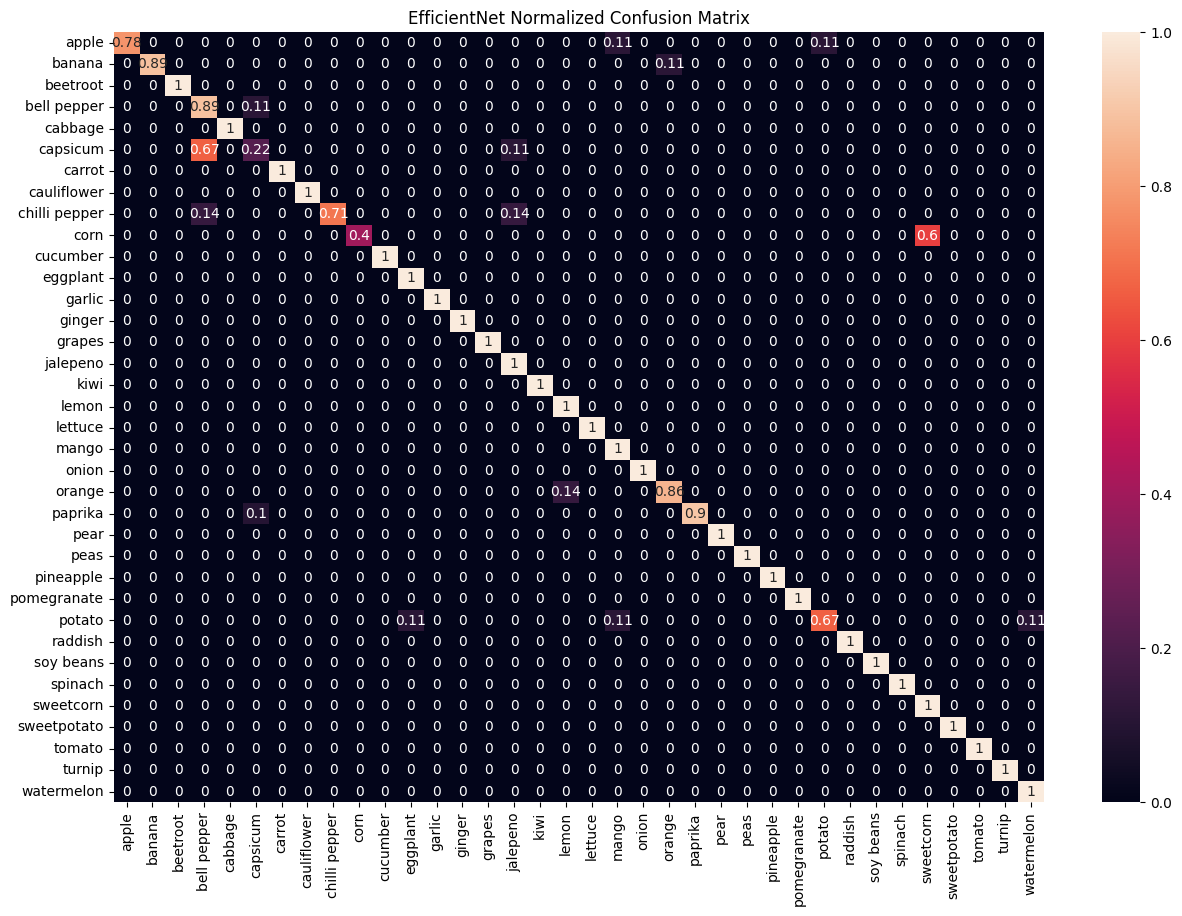

In [ ]:
efficientnet_cf_matrix = confusion_matrix(y_test, efficientnet_pred, normalize="true")
plt.figure(figsize=(15, 10))
sns.heatmap(
    efficientnet_cf_matrix,
    annot=True,
    xticklabels=sorted(set(y_test)),
    yticklabels=sorted(set(y_test)),
)
plt.title("EfficientNet Normalized Confusion Matrix")
plt.show()

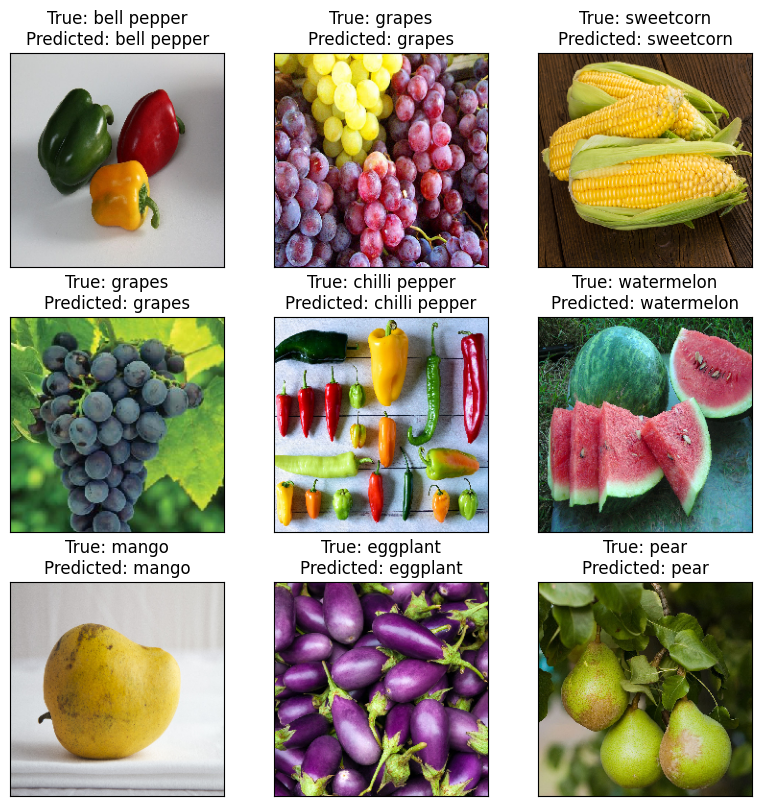

In [ ]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(8, 8), subplot_kw={"xticks": [], "yticks": []}
)

for i, ax in enumerate(axes.flat):
    img = keras.preprocessing.image.load_img(
        test_df.Filepath[i], target_size=(224, 224)
    )
    ax.imshow(img)
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {efficientnet_pred[i]}")
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
mobilenet_pred = mobilenet_model.predict(test_images_mobilenet)
mobilenet_pred = np.argmax(mobilenet_pred, axis=1)
mobilenet_pred = [labels[k] for k in mobilenet_pred]

# y_test = [labels[k] for k in test_images_mobilenet.classes]

11/11 ━━━━━━━━━━━━━━━━━━━━ 159s 14s/step


In [ ]:
prediction_result(mobilenet_pred, y_test)

--- Side-by-Side Results ---
       True_Label Predicted_Label
0     bell pepper     bell pepper
1          grapes          grapes
2       sweetcorn       sweetcorn
3          grapes          grapes
4   chilli pepper        jalepeno
5      watermelon      watermelon
6           mango           mango
7        eggplant        eggplant
8            pear            pear
9          orange          orange
10         banana          banana
11         potato         raddish
12         grapes          grapes
13          lemon           lemon
14           kiwi            kiwi

--- Model Mistakes ---
        True_Label Predicted_Label
4    chilli pepper        jalepeno
11          potato         raddish
33        capsicum     bell pepper
49            corn       sweetcorn
67           apple        capsicum
72          banana         raddish
142           corn       sweetcorn
145           corn       sweetcorn
155           corn       sweetcorn
157         banana            peas
158         grapes

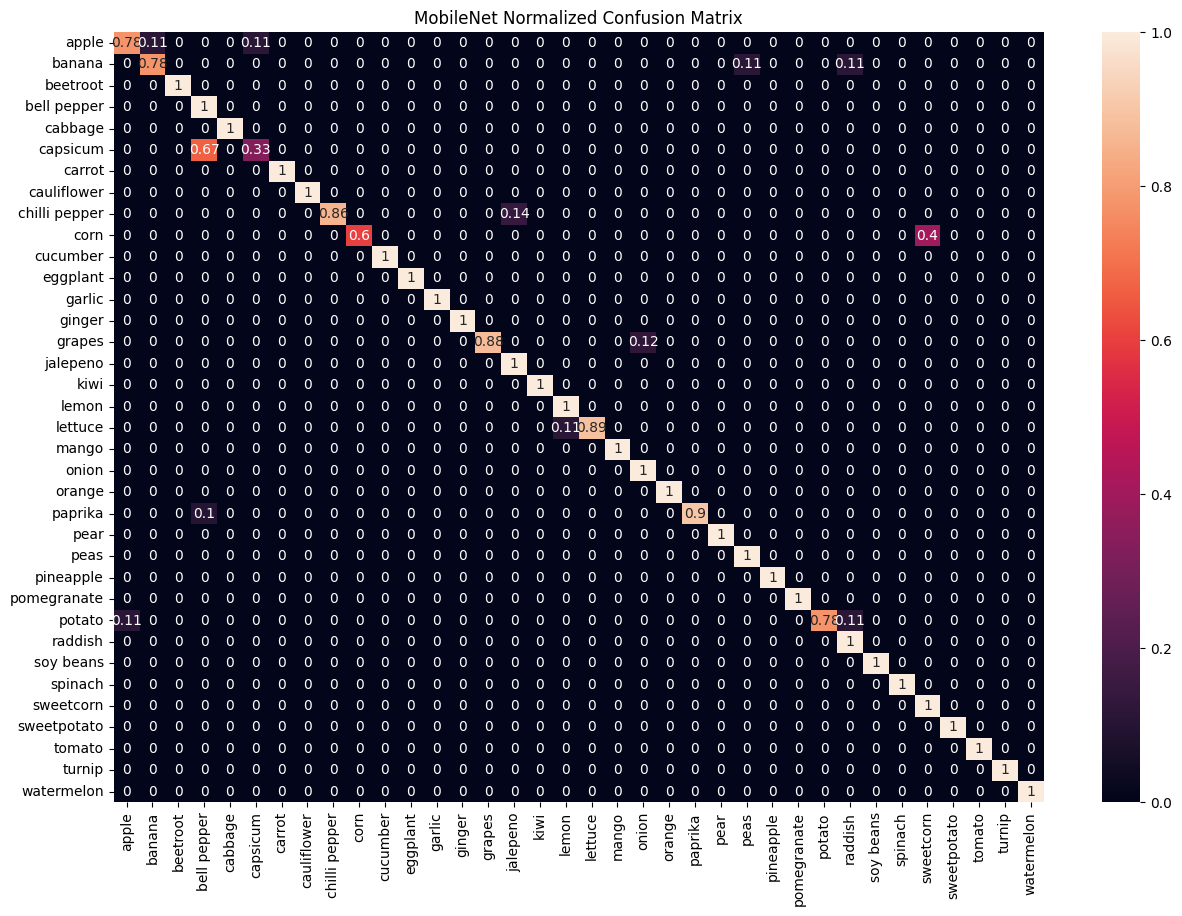

In [ ]:
mobilenet_cf_matrix = confusion_matrix(y_test, mobilenet_pred, normalize="true")
plt.figure(figsize=(15, 10))
sns.heatmap(
    mobilenet_cf_matrix,
    annot=True,
    xticklabels=sorted(set(y_test)),
    yticklabels=sorted(set(y_test)),
)
plt.title("MobileNet Normalized Confusion Matrix")
plt.show()

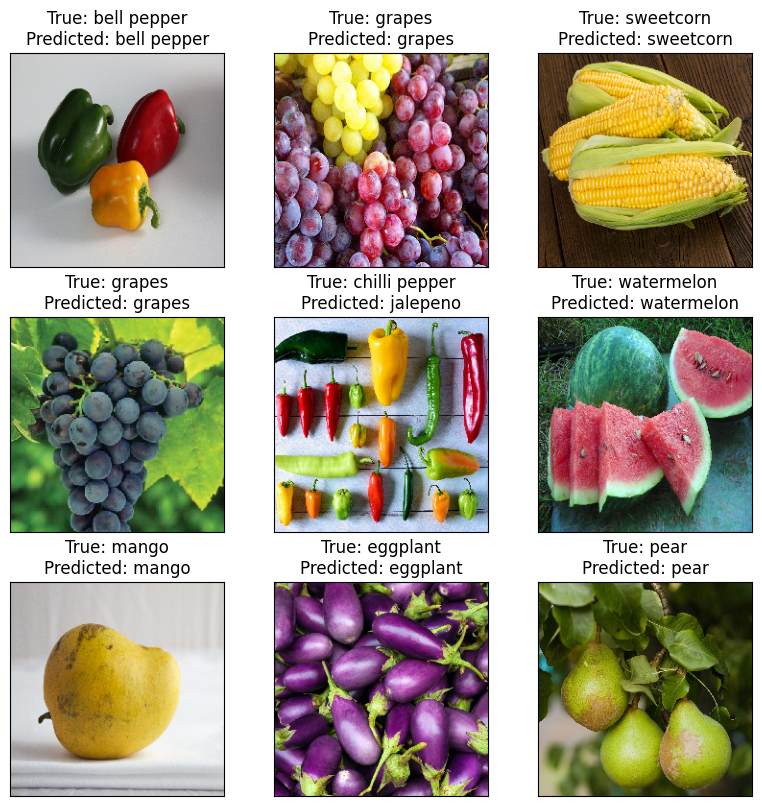

In [ ]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(8, 8), subplot_kw={"xticks": [], "yticks": []}
)

for i, ax in enumerate(axes.flat):
    img = keras.preprocessing.image.load_img(
        test_df.Filepath[i], target_size=(224, 224)
    )
    ax.imshow(img)
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {mobilenet_pred[i]}")
plt.tight_layout(pad=0.5)
plt.show()